# SLO Twitter Data Analysis  - Codebase Introduction

    
The following sections provides an introduction to how we have set up out codebase for twitter data analysis..<br>



## Import libraries and set parameters:


We import the required libraries as well as our dataset creator and custom utility functions for data analysis.<br>



In [2]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
# import dataset_processor_adapted as dataset_create
import slo_twitter_data_analysis_utility_functions as tweet_util_v2


Pandas settings alters the maximum number of rows, columns, the column width, and overall display width.  We also specify the number of decimal places to display for floating point values and filter out several warning types to reduce potential output clutter.  Last, we set the log level for matplotlib to avoid extraneous debug output.<br>



In [3]:
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)


Change log levels between "INFO" and "DEBUG" depending on whether you wish to see log output or not.  This affects basic Python interpreter log statements but not necessarily the log output for matplotlib and other libraries that have their own logger.<br>



In [4]:
"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)

## Dataset Creation:


We create out dataset using the function call below and "dataset_processor_adapted_v2.py".

Note: Don't execute this function call unless you have approximately 51 hours of free computational time.<br>



In [ ]:
    # Absolute file path.
    dataset_create.create_dataset("D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
                   "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/twitter-dataset-6-25-19",
                   False)


Currently, we have extracted the following fields in the Lists below and derived additional fields from them.  Anything with the "derived" prefix indicates a field we have derived from the native fields present in the JSON structure.  Anything with the "tweet" prefix indicates a renamed attribute that is present in the main Tweet object.  Anything with the "user" prefix is a nested attribute we have extracted from the "user" object in the main Tweet object of the JSON file structure.  Anything with the "entities" prefix is a nested attribute we have extracted from the "entities" object in the main Tweet object of the JSON file structure.  Anything with the "retweeted_status" prefix is a nested attribute we have extracted from the "retweeted_status" object in the main Tweet object of the JSON file structure.  Anything with the "retweeted_status_user" prefix is a nested atributes we have extracted from the "user" object in the "retweeted_user" sub-object present in the main Tweet object of the JSON file structure.<br>

Note: Modified copy/paste from "dataset_processor_v2.py"



In [ ]:
tweet_object_fields = [
    'tweet_created_at', 'tweet_id', 'tweet_full_text', 'tweet_in_reply_to_status_id',
    'tweet_in_reply_to_user_id', 'tweet_in_reply_to_screen_name', 'tweet_retweet_count',
    'tweet_favorite_count', 'tweet_lang']

user_object_fields = [
    'user_id', 'user_name', 'user_screen_name', 'user_location', 'user_description',
    'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count',
    'user_statuses_count', 'user_created_at', 'user_time_zone', 'user_lang']

entities_object_fields = [
    "tweet_entities_expanded_urls", "tweet_entities_hashtags", "tweet_entities_user_mentions_id",
    "tweet_entities_user_mentions_name", "tweet_entities_user_mentions_screen_name",
    "tweet_entities_symbols"]

retweeted_status_object_fields = [
    'retweeted_status_created_at', 'retweeted_status_id', 'retweeted_status_full_text',
    'retweeted_status_in_reply_to_status_id', 'retweeted_status_in_reply_to_user_id',
    'retweeted_status_in_reply_to_screen_name', 'retweeted_status_retweet_count',
    'retweeted_status_favorite_count', 'retweeted_status_lang',
    'retweeted_status_entities',
    'retweeted_status_user', 'retweeted_status_coordinates', 'retweeted_status_place']

retweeted_status_user_object_fields = [
    'retweeted_status_user_id', 'retweeted_status_user_name', 'retweeted_status_user_screen_name',
    'retweeted_status_user_location', 'retweeted_status_user_description', 'retweeted_status_user_followers_count',
    'retweeted_status_user_friends_count', 'retweeted_status_user_listed_count',
    'retweeted_status_user_favourites_count', 'retweeted_status_user_statuses_count',
    'retweeted_status_user_created_at', 'retweeted_status_user_time_zone', 'retweeted_status_user_lang']

required_fields = \
    ['retweeted_derived', 'company_derived', 'text_derived',  # "tweet_quoted_status_id",
     'tweet_url_link_derived', 'multiple_companies_derived_count', "company_derived_designation",
     'tweet_text_length_derived', "spaCy_language_detect",
     "user_description_text_length"] 

## Data Analysis Utility Functions:


The following sample function calls illustrate how we use the utility functions in "slo_twitter_data_analysis_utility_functions_v2.py" to perform individual/multi attribute extraction/export and data chuncking extraction/export.<br>



In [ ]:
    # Read in JSON/CSV data as chunks and export to CSV/JSON files.
    tweet_util_v2.generalized_data_chunking_file_export_function(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/dataset-chunks/", "csv")

In [ ]:
    # Extract various nested attributes from a outer attribute in the raw JSON file and export to CSV or JSON file.
    # We extract 13 different attributes (some nested).
    tweet_util_v2.flatten_extract_nested_json_attributes(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/retweeted-nested-attributes.csv",
        "retweeted_status",
        ['created_at', 'id', 'full_text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_screen_name',
         'retweet_count', 'favorite_count', 'lang', 'entities', 'user', 'coordinates', 'place'],
        "csv")

In [ ]:
    # Extract various single or multiple attributes in the raw JSON file and export to JSON or CSV.
    tweet_util_v2.extract_single_multi_json_attributes(
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/twitter-dataset-extract-json-test.json",
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/twitter-dataset-extract-test_results",
        ['created_at', 'id', 'full_text', 'in_reply_to_status_id', 'quoted_status_id',
         'in_reply_to_user_id', 'in_reply_to_screen_name',
         'retweet_count', 'favorite_count', 'lang'],
        "csv")


Refer to the Python file itself if interested in that codebase.  Several graphing helper functions are also included.<br>



## Execution Time for Data Analysis Operations:


We time the execution of our data analysis operations using the code snippet below.  This allows us to determine whether we should separate our primary Twitter dataset into smaller subsets containing only the specific attributes required for that specific analysis function in order to reduce computational time.<br>



In [5]:
my_start_time = time.time()

# Insert function call or loose code here.

my_end_time = time.time()

time_elapsed_in_seconds = (my_end_time - my_start_time)
time_elapsed_in_minutes = (my_end_time - my_start_time) / 60.0
time_elapsed_in_hours = (my_end_time - my_start_time) / 60.0 / 60.0
print(f"Time taken to process dataset: {time_elapsed_in_seconds} seconds, "
      f"{time_elapsed_in_minutes} minutes, {time_elapsed_in_hours} hours")

Time taken to process dataset: 0.0 seconds, 0.0 minutes, 0.0 hours


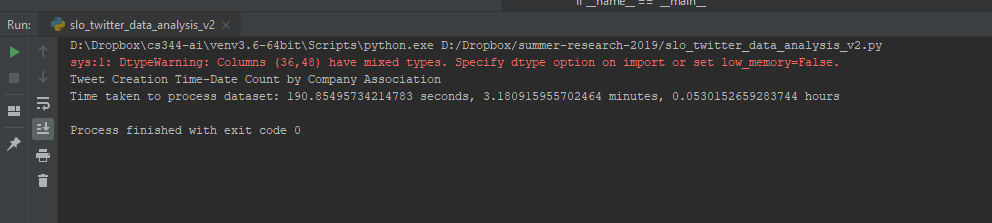

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "images/"
Image(filename = PATH + "time_series_analysis_function_execution_time.PNG", width=1024, height=768)


Our current Twitter dataset includes quite a few columns for each of the 650k+ Tweets.  It takes approximately 3 minutes to execute the Time Series analysis function.  Therefore, we might consider extracting just the necessary fields for this function to a separate CSV file in order to reduce computational time.<br>



## Display raw JSON file data chunk dataframe information:


By specifying "none" as the function name, we simply print out logger INFO on the shape, columns, and a single sample of the dataframe on the first chunk of data.  We use this function as the raw JSON file is too large to fit into system RAM.<br>



In [8]:
    # Specify and call data analysis functions on chunked raw JSON Tweet file.
    tweet_util_v2.call_data_analysis_function_on_json_file_chunks(
        "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json", "none")

INFO:root:
The shape of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:(100000, 30)
INFO:root:
The columns of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
INFO:root:
The first row from the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:
contributors                                                              


As can be seen, each Tweet object in its raw JSON form contains many different attributes.  The "user" attribute is a Object itself that especially contains many other attributes and Objects.<br>



## Import raw JSON converted to CSV  Twitter dataset file:


We read in the Twitter dataset as a CSV file and generate a Pandas dataframe from the dataset.<br>

Note: Does not contain all fields from the raw JSON file; only the ones we are currently interested in analyzing.  We will append columns to the CSV file as necessary if additional attributes become relevant for analysis.  Anything with "derived" is a derived column created via .apply(function) to the native attributes.<br>



In [5]:
    # Import CSV dataset and convert to dataframe.
    tweet_csv_dataframe = tweet_util_v2.import_dataset(
        "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/twitter-dataset-6-27-19.csv",
        "csv", True)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
INFO:root:
The shape of our dataframe storing the contents of the csv Tweet data is:

INFO:root:(670423, 37)
INFO:root:
The columns of our dataframe storing the contents of the csv Tweet data is:

INFO:root:Index(['retweeted_derived', 'company_derived', 'text_derived',
       'tweet_url_link_derived', 'multiple_companies_derived_count',
       'company_derived_designation', 'tweet_text_length_derived',
       'spaCy_language_detect_all_tweets', 'user_description_text_length',
       'tweet_created_at', 'tweet_id', 'tweet_full_text',
       'tweet_in_reply_to_status_id', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_screen_name', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_lang', 'user_id', 'user_name',
       'user_screen_nam

 
The above log.INFO output shows the shape, columns, and a sample from the Pandas Dataframe that contains the entirety of the CSV file.<br>
 
